# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 571


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
    
    # # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    response = requests.get(city_url)
     
    try:
        # Parse the JSON and retrieve data
        city_weather = response.json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | namibe
Processing Record 2 of Set 1 | papatowai
Processing Record 3 of Set 1 | stanley
Processing Record 4 of Set 1 | aracati
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | port mathurin
Processing Record 7 of Set 1 | college
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | taiohae
City not found. Skipping...
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | weno
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | christchurch
Processing Record 15 of Set 1 | talnakh
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | dudinka
Processing Record 18 of Set 1 | aldinga beach
Processing Record 19 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 20 of Set 1 | lorengau
Processing Record 21 of Set 1 | kone
Processing Record 22 

In [12]:
# Convert the cities weather data into a Pandas DataFrame                      
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,namibe,-15.1961,12.1522,295.94,87,100,1.90,AO,1701628232
1,papatowai,-46.5619,169.4708,282.47,58,100,5.71,NZ,1701628234
2,stanley,54.8680,-1.6985,272.75,93,92,0.62,GB,1701628231
3,aracati,-4.5617,-37.7697,302.79,60,12,6.55,BR,1701628237
4,bethel,41.3712,-73.4140,281.59,89,100,4.63,US,1701628238


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,namibe,-15.1961,12.1522,295.94,87,100,1.90,AO,1701628232
1,papatowai,-46.5619,169.4708,282.47,58,100,5.71,NZ,1701628234
2,stanley,54.8680,-1.6985,272.75,93,92,0.62,GB,1701628231
3,aracati,-4.5617,-37.7697,302.79,60,12,6.55,BR,1701628237
4,bethel,41.3712,-73.4140,281.59,89,100,4.63,US,1701628238


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

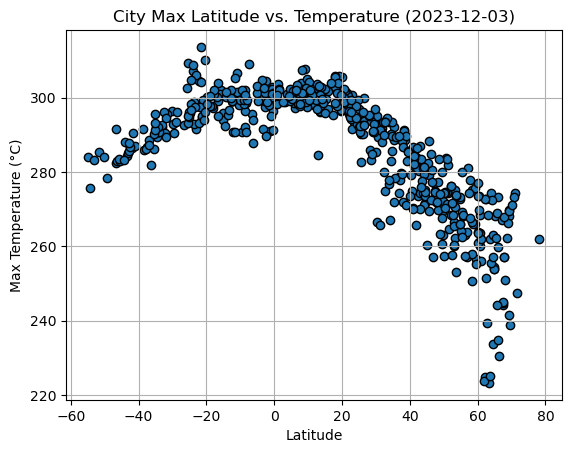

In [17]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']

plt.scatter(x_axis, y_axis, edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2023-12-03)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)') 
plt.grid()

# # Save the figure
plt.savefig("output_data/Fig1.png")

# # Show plot
plt.show()

#### Latitude Vs. Humidity

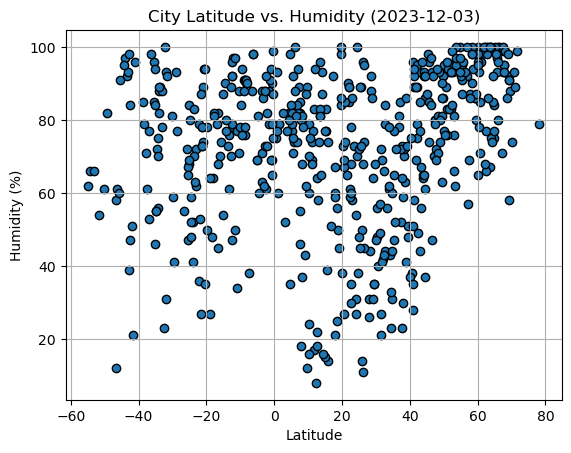

In [18]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']

plt.scatter(x_axis, y_axis, edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2023-12-03)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)') 
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

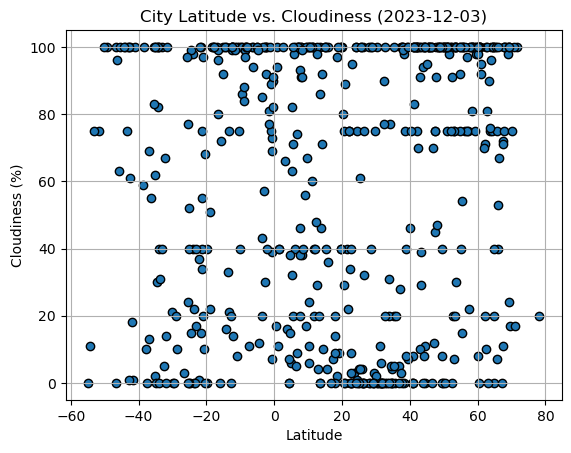

In [19]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']

plt.scatter(x_axis, y_axis, edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2023-12-03)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)') 
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

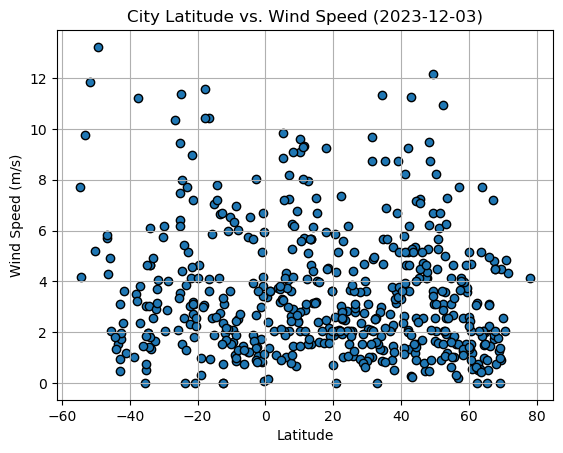

In [20]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']

plt.scatter(x_axis, y_axis, edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2023-12-03)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)') 
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def lin_regree_plot_func(x_values, y_values, x_label, y_label):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    regressed_values = (slope * x_values) + intercept
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regressed_values, color='r')
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color='red')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    correlation_coefficient = f'The r-value is: {rvalue}'
    return correlation_coefficient
    print(correlation_coefficient)
    plt.show()

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,stanley,54.8680,-1.6985,272.75,93,92,0.62,GB,1701628231
4,bethel,41.3712,-73.4140,281.59,89,100,4.63,US,1701628238
6,college,64.8569,-147.8028,253.96,75,20,1.54,US,1701628240
10,weno,7.4515,151.8468,301.12,89,100,3.60,FM,1701628246
11,tiksi,71.6872,128.8694,247.37,99,100,4.31,RU,1701628247


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,namibe,-15.1961,12.1522,295.94,87,100,1.90,AO,1701628232
1,papatowai,-46.5619,169.4708,282.47,58,100,5.71,NZ,1701628234
3,aracati,-4.5617,-37.7697,302.79,60,12,6.55,BR,1701628237
5,port mathurin,-19.6833,63.4167,300.20,78,40,4.63,MU,1701628239
7,ushuaia,-54.8000,-68.3000,283.96,62,0,7.72,AR,1701628240


###  Temperature vs. Latitude Linear Regression Plot

'The r-value is: -0.8737688674626225'

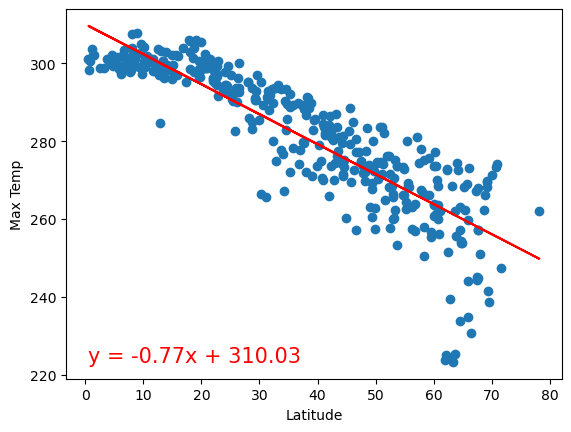

In [24]:
# Linear regression on Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Max Temp']

lin_regree_plot_func(x_axis, y_axis, "Latitude", "Max Temp")

'The r-value is: 0.6833062951069706'

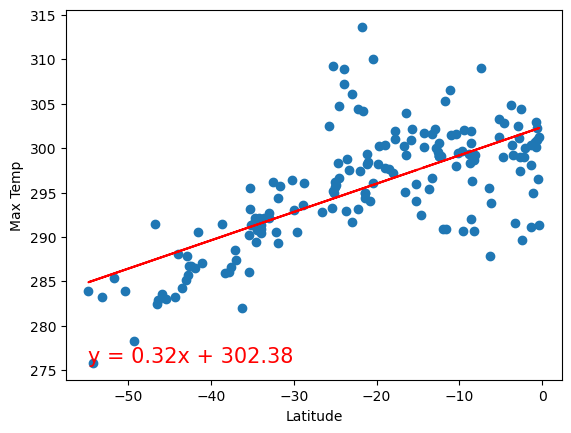

In [25]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Max Temp']

lin_regree_plot_func(x_axis, y_axis, "Latitude", "Max Temp")

**Discussion about the linear relationship:** The linear relationships in the above two plots show that the temperature is high near the equator. While temperature decreases if we move away from the equator.

### Humidity vs. Latitude Linear Regression Plot

'The r-value is: 0.39572224614040635'

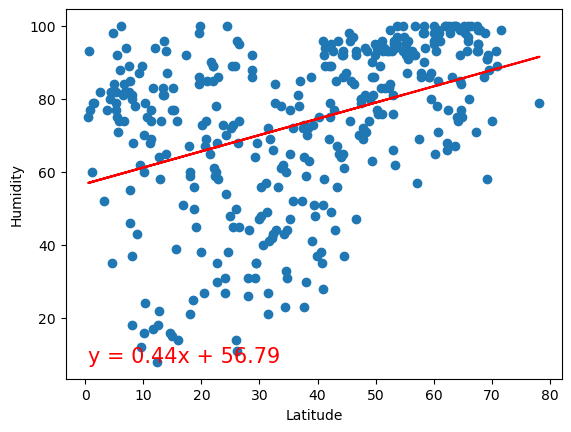

In [26]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Humidity']

lin_regree_plot_func(x_axis, y_axis, "Latitude", "Humidity")

'The r-value is: 0.20597830273892304'

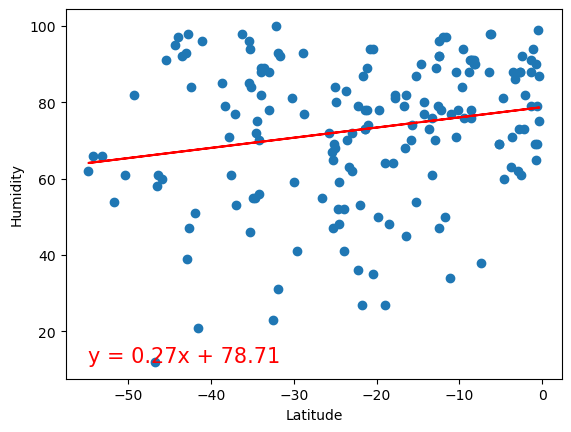

In [27]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Humidity']

lin_regree_plot_func(x_axis, y_axis, "Latitude", "Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

'The r-value is: 0.23146039771525856'

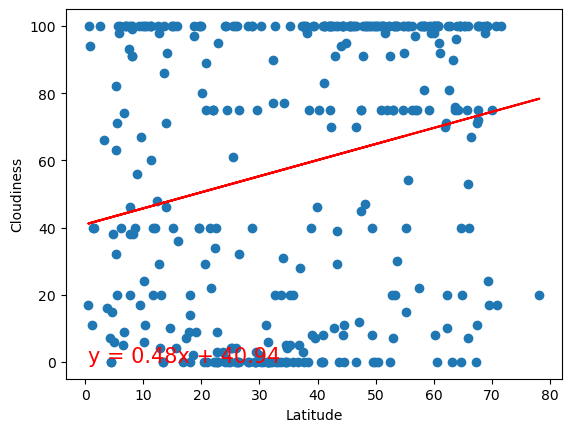

In [28]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Cloudiness']

lin_regree_plot_func(x_axis, y_axis, "Latitude", "Cloudiness")

'The r-value is: 0.1990969069844713'

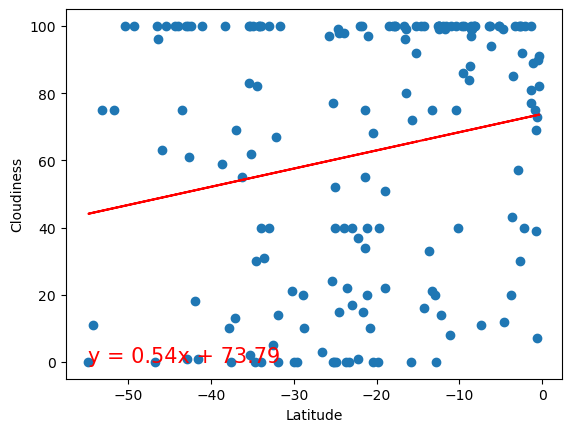

In [29]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Cloudiness']

lin_regree_plot_func(x_axis, y_axis, "Latitude", "Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

'The r-value is: -0.15318354587943897'

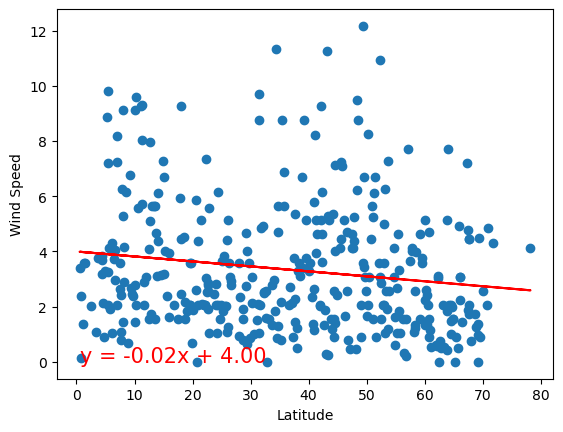

In [30]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Wind Speed']

lin_regree_plot_func(x_axis, y_axis, "Latitude", "Wind Speed")

'The r-value is: -0.16112697527678582'

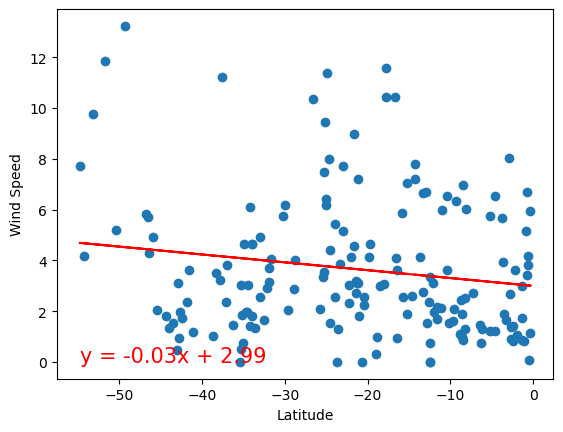

In [31]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Wind Speed']

lin_regree_plot_func(x_axis, y_axis, "Latitude", "Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE